#Análise Exploratória de Dados (EDA)

In [22]:

# ============================================
# ANÁLISE EXPLORATÓRIA - CONSUMO ENERGÉTICO
# Dataset: Steel Industry Energy Consumption (https://www.kaggle.com/datasets/nimapourmoradi/steel-dataset)
# Objetivo: Entender padrões e preparar para ML
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import seaborn as sns
import numpy as np 

#Configuração
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
print("✅ Bibliotecas carregadas!")


✅ Bibliotecas carregadas!


##Carregando Dados

In [8]:
df = pd.read_csv("../data/raw/Steel_industry_data.csv")

print(f"✅ Dataset carregado!")
print(f"📊 Shape: {df.shape}")
print(f"📋 Memória: {df.memory_usage().sum() / 1024**2:.2f} MB")
print(f"\nPrimeiras colunas:")
print(df.columns.tolist())

✅ Dataset carregado!
📊 Shape: (35041, 11)
📋 Memória: 2.94 MB

Primeiras colunas:
['Date_Time', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_Of_Week', 'Load_Type']


In [9]:
df.head(10)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [16]:
df.tail(10)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
35031,31/12/2018 22:00,3.42,0.00,13.07,0.0,100.00,25.31,79200,Weekday,Monday,Light_Load
35032,31/12/2018 22:15,3.24,3.38,0.22,0.0,69.20,99.77,80100,Weekday,Monday,Light_Load
35033,31/12/2018 22:30,3.67,4.43,0.00,0.0,63.80,100.00,81000,Weekday,Monday,Light_Load
35034,31/12/2018 22:45,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday,Light_Load
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load
35040,31/12/2018 20:00,4.15,0.00,20.10,0.0,100.00,20.19,72000,Weekday,Monday,Light_Load


In [15]:
df.sample(10)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
15121,07/06/2018 12:30,5.08,0.00,25.81,0.0,100.00,19.31,45000,Weekday,Thursday,Medium_Load
2618,28/01/2018 06:45,4.18,4.79,0.00,0.0,65.75,100.00,24300,Weekend,Sunday,Light_Load
13752,24/05/2018 06:15,2.99,5.11,0.00,0.0,50.50,100.00,22500,Weekday,Thursday,Light_Load
5680,01/03/2018 04:15,3.71,4.79,0.00,0.0,61.23,100.00,15300,Weekday,Thursday,Light_Load
26478,03/10/2018 19:45,3.60,0.00,17.42,0.0,100.00,20.24,71100,Weekday,Wednesday,Medium_Load
25645,25/09/2018 03:30,2.66,5.62,0.00,0.0,42.78,100.00,12600,Weekday,Tuesday,Light_Load
17464,01/07/2018 22:15,2.99,0.86,10.62,0.0,96.10,27.10,80100,Weekend,Sunday,Light_Load
22110,19/08/2018 07:45,2.59,4.54,0.00,0.0,49.55,100.00,27900,Weekend,Sunday,Light_Load
15303,09/06/2018 10:00,3.56,0.00,17.60,0.0,100.00,19.83,36000,Weekend,Saturday,Light_Load
15417,10/06/2018 14:30,3.10,0.00,16.20,0.0,100.00,18.79,52200,Weekend,Sunday,Light_Load


In [10]:
#Infos do dataset
print("="*70)
print("INFORMAÇÕES DO DATASET")
print("="*70)
df.info()
print("\n" + "="*70)
print("ESTATÍSTICAS DESCRITIVAS")
print("="*70)
df.describe()

INFORMAÇÕES DO DATASET
<class 'pandas.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  str    
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2(tCO2)                             35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  str    
 9   Day_Of_Week                           35041 non-null  str    
 10  Load_Type                             35041 non-null  str    
dtypes: 

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000
mean,27.386229,13.035012,3.871412,0.011524,80.578610,84.366038,42750.834736
std,33.444133,16.305916,7.424863,0.016151,18.921337,30.458030,24940.667915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,43200.000000
75%,51.230000,22.640000,2.090000,0.020000,99.030000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Sem valores nulos! Porém temos valores com 0, acho necessário uma maior investigação por agora, para facilitar na construção do modelo de regressão no futuro.


In [23]:
print("="*70)
print("🔍 INVESTIGAÇÃO DE VALORES ZERO")
print("="*70)

# Contar zeros em cada coluna numérica
numeric_cols = df.select_dtypes(include=[np.number]).columns

zero_counts = {}
for col in numeric_cols:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    if zero_count > 0:
        zero_counts[col] = {'count': zero_count, 'percent': zero_pct}

# Mostrar resultados
zero_df = pd.DataFrame(zero_counts).T.sort_values('percent', ascending=False)
print("\nColunas com valores ZERO:")
print(zero_df)

# Análise específica do target
target_zeros = (df['Usage_kWh'] == 0).sum()
print(f"\n🎯 TARGET (Usage_kWh):")
print(f"  Zeros: {target_zeros} ({target_zeros/len(df)*100:.2f}%)")

if target_zeros > 0:
    print(f"  ⚠️ ATENÇÃO: {target_zeros} registros com consumo ZERO!")
    print(f"  Isso pode ser normal (máquina parada) ou erro de medição")

🔍 INVESTIGAÇÃO DE VALORES ZERO

Colunas com valores ZERO:
                                        count    percent
Leading_Current_Reactive_Power_kVarh  23610.0  67.378214
CO2(tCO2)                             20991.0  59.904112
Lagging_Current_Reactive.Power_kVarh   7195.0  20.533090
Hour                                   1460.0   4.166548
NSM                                     365.0   1.041637
Usage_kWh                                 1.0   0.002854
Leading_Current_Power_Factor              1.0   0.002854
Lagging_Current_Power_Factor              1.0   0.002854

🎯 TARGET (Usage_kWh):
  Zeros: 1 (0.00%)
  ⚠️ ATENÇÃO: 1 registros com consumo ZERO!
  Isso pode ser normal (máquina parada) ou erro de medição


In [32]:
print("="*70)
print("⚡ INVESTIGAÇÃO: POTÊNCIA REATIVA")
print("="*70)

# Encontrar colunas de potência reativa automaticamente
reactive_cols = [col for col in df.columns if 'Reactive' in col and 'Power' in col]
print(f"Colunas de Potência Reativa encontradas:")
for col in reactive_cols:
    print(f"  - '{col}'")

# Separar Leading e Lagging
leading_col = [col for col in reactive_cols if 'Leading' in col][0]
lagging_col = [col for col in reactive_cols if 'Lagging' in col][0]

print(f"\nUsando:")
print(f"  Leading: {leading_col}")
print(f"  Lagging: {lagging_col}")

# Agora criar máscaras
leading_is_zero = df[leading_col] == 0
lagging_is_zero = df[lagging_col] == 0
both_are_zero = leading_is_zero & lagging_is_zero

# Contar
leading_zero_count = leading_is_zero.sum()
lagging_zero_count = lagging_is_zero.sum()
both_zero_count = both_are_zero.sum()

print(f"\nPadrão de zeros:")
print(f"  Leading = 0: {leading_zero_count:,} ({leading_zero_count/len(df)*100:.1f}%)")
print(f"  Lagging = 0: {lagging_zero_count:,} ({lagging_zero_count/len(df)*100:.1f}%)")
print(f"  AMBOS = 0: {both_zero_count:,} ({both_zero_count/len(df)*100:.1f}%)")

# Análise quando Leading é zero
print(f"\n📊 Quando Leading = 0:")
print(f"  Consumo médio: {df[leading_is_zero]['Usage_kWh'].mean():.2f} kWh")

print(f"\n📊 Quando Leading > 0:")
print(f"  Consumo médio: {df[~leading_is_zero]['Usage_kWh'].mean():.2f} kWh")

print("\n💡 Zeros em Leading são NORMAIS em indústria (cargas indutivas)!")

⚡ INVESTIGAÇÃO: POTÊNCIA REATIVA
Colunas de Potência Reativa encontradas:
  - 'Lagging_Current_Reactive.Power_kVarh'
  - 'Leading_Current_Reactive_Power_kVarh'

Usando:
  Leading: Leading_Current_Reactive_Power_kVarh
  Lagging: Lagging_Current_Reactive.Power_kVarh

Padrão de zeros:
  Leading = 0: 23,610 (67.4%)
  Lagging = 0: 7,195 (20.5%)
  AMBOS = 0: 1 (0.0%)

📊 Quando Leading = 0:
  Consumo médio: 33.86 kWh

📊 Quando Leading > 0:
  Consumo médio: 14.02 kWh

💡 Zeros em Leading são NORMAIS em indústria (cargas indutivas)!


##Identificando Target e colunas

In [ ]:
print("TODAS AS COLUNAS")

for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

#A variável Usage_kWh será a nossa target muito provavelmente

TODAS AS COLUNAS
 1. Date_Time
 2. Usage_kWh
 3. Lagging_Current_Reactive.Power_kVarh
 4. Leading_Current_Reactive_Power_kVarh
 5. CO2(tCO2)
 6. Lagging_Current_Power_Factor
 7. Leading_Current_Power_Factor
 8. NSM
 9. WeekStatus
10. Day_Of_Week
11. Load_Type


##Análise do Target e conversão do Date_Time

In [13]:
df.head(5)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [19]:
# Converter Date_Time para datetime (formato brasileiro: DD/MM/YYYY)
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True)

# Extrair features temporais úteis
df['Hour'] = df['Date_Time'].dt.hour
df['Month'] = df['Date_Time'].dt.month
df['DayOfMonth'] = df['Date_Time'].dt.day

print("✅ Date_Time convertido!")
print(f"Período dos dados: {df['Date_Time'].min()} até {df['Date_Time'].max()}")
print(f"Duração: {(df['Date_Time'].max() - df['Date_Time'].min()).days} dias")

# Verificar
print(f"\nPrimeiras datas:")
print(df[['Date_Time', 'Hour', 'Month']].head())

✅ Date_Time convertido!
Período dos dados: 2018-01-01 00:00:00 até 2018-12-31 23:45:00
Duração: 364 dias

Primeiras datas:
            Date_Time  Hour  Month
0 2018-01-01 00:15:00     0      1
1 2018-01-01 00:30:00     0      1
2 2018-01-01 00:45:00     0      1
3 2018-01-01 01:00:00     1      1
4 2018-01-01 01:15:00     1      1


In [20]:
#Agora analisando o target

target = 'Usage_kWh'

print("="*70)
print(f"📊 ANÁLISE DO TARGET: {target}")
print("="*70)

print(f"\nEstatísticas:")
print(f"  Média:    {df[target].mean():.2f} kWh")
print(f"  Mediana:  {df[target].median():.2f} kWh")
print(f"  Desvio:   {df[target].std():.2f} kWh")
print(f"  Min:      {df[target].min():.2f} kWh")
print(f"  Max:      {df[target].max():.2f} kWh")
print(f"  Range:    {df[target].max() - df[target].min():.2f} kWh")

# Assimetria e Curtose
print(f"\nForma da Distribuição:")
print(f"  Skewness: {df[target].skew():.2f}")
print(f"  Kurtosis: {df[target].kurtosis():.2f}")

📊 ANÁLISE DO TARGET: Usage_kWh

Estatísticas:
  Média:    27.39 kWh
  Mediana:  4.57 kWh
  Desvio:   33.44 kWh
  Min:      0.00 kWh
  Max:      157.18 kWh
  Range:    157.18 kWh

Forma da Distribuição:
  Skewness: 1.20
  Kurtosis: 0.39


🔗 MATRIZ DE CORRELAÇÃO

📊 CORRELAÇÃO COM USAGE_KWH (Target):
Usage_kWh                               1.000000
CO2(tCO2)                               0.988180
Lagging_Current_Reactive.Power_kVarh    0.896151
Lagging_Current_Power_Factor            0.385932
Leading_Current_Power_Factor            0.353583
NSM                                     0.234581
Hour                                    0.234144
DayOfMonth                             -0.008205
Month                                  -0.113987
Leading_Current_Reactive_Power_kVarh   -0.324941
Name: Usage_kWh, dtype: float64


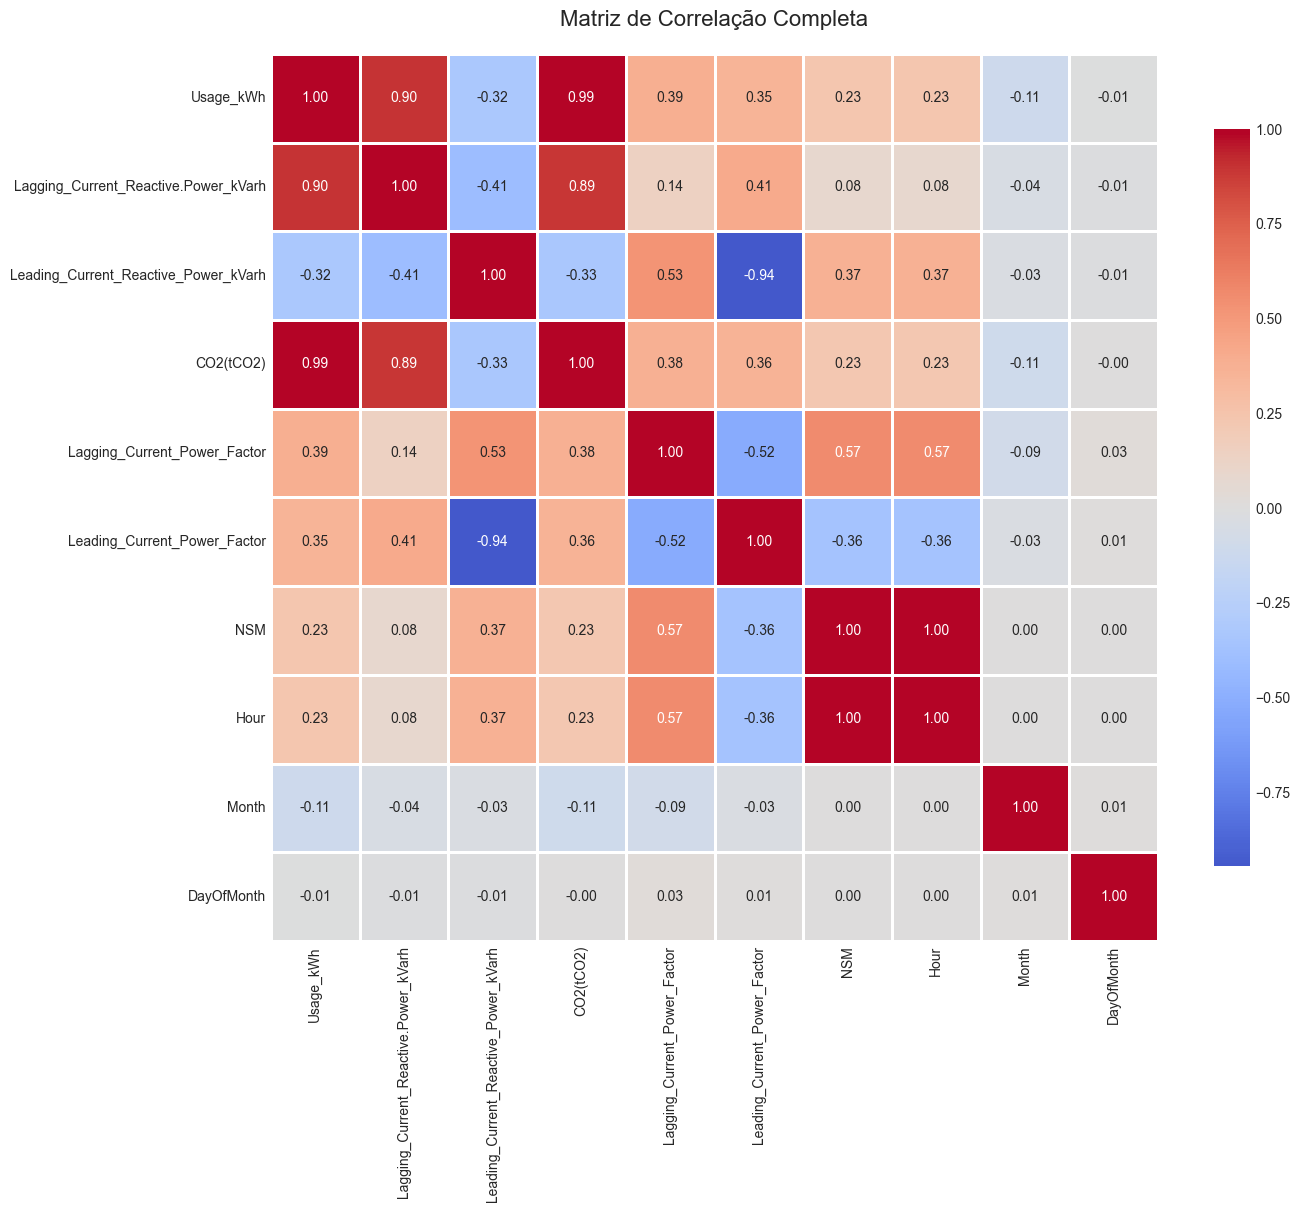


⚠️ PARES COM MULTICOLINEARIDADE ALTA (|r| > 0.9):
  • Usage_kWh                                <-> CO2(tCO2)                               : 0.988
  • Leading_Current_Reactive_Power_kVarh     <-> Leading_Current_Power_Factor            : -0.944
  • NSM                                      <-> Hour                                    : 0.999

  💡 AÇÃO: Considere remover uma das variáveis de cada par!


In [33]:
print("="*70)
print("🔗 MATRIZ DE CORRELAÇÃO")
print("="*70)

# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

# Correlação com o target
target_corr = corr_matrix['Usage_kWh'].sort_values(ascending=False)
print("\n📊 CORRELAÇÃO COM USAGE_KWH (Target):")
print(target_corr)

# Visualização
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação Completa', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Identificar multicolinearidade ALTA
print("\n⚠️ PARES COM MULTICOLINEARIDADE ALTA (|r| > 0.9):")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    for col1, col2, corr_val in high_corr_pairs:
        print(f"  • {col1[:40]:40s} <-> {col2[:40]:40s}: {corr_val:.3f}")
    print("\n  💡 AÇÃO: Considere remover uma das variáveis de cada par!")
else:
    print("  ✅ Nenhuma multicolinearidade crítica detectada")

In [34]:
print("="*70)
print("🧹 LIMPEZA DE MULTICOLINEARIDADE")
print("="*70)

# Lista de colunas a remover
cols_to_drop = [
    'CO2(tCO2)',  # Redundante com Usage_kWh (0.988)
    'NSM',  # Redundante com Hour (0.999)
    'Leading_Current_Reactive_Power_kVarh',  # Redundante com Power Factor
    'Leading_Current_Power_Factor'  # Vamos manter só Lagging (mais comum na indústria)
]

print("\n📋 Colunas ANTES da limpeza:")
print(f"  Total: {len(df.columns)} colunas")
print(df.columns.tolist())

# Verificar quais existem
cols_exist = [col for col in cols_to_drop if col in df.columns]
print(f"\n🗑️ Removendo {len(cols_exist)} colunas:")
for col in cols_exist:
    print(f"  ❌ {col}")

# Criar dataframe limpo
df_clean = df.drop(columns=cols_exist)

print(f"\n📋 Colunas APÓS limpeza:")
print(f"  Total: {len(df_clean.columns)} colunas")
print(df_clean.columns.tolist())

# Verificar correlações novamente
print("\n✅ VERIFICANDO MULTICOLINEARIDADE NO DATASET LIMPO:")
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
corr_matrix_clean = df_clean[numeric_cols].corr()

# Procurar pares com |r| > 0.9
high_corr_remaining = []
for i in range(len(corr_matrix_clean.columns)):
    for j in range(i+1, len(corr_matrix_clean.columns)):
        if abs(corr_matrix_clean.iloc[i, j]) > 0.9:
            high_corr_remaining.append((
                corr_matrix_clean.columns[i],
                corr_matrix_clean.columns[j],
                corr_matrix_clean.iloc[i, j]
            ))

if high_corr_remaining:
    print("  ⚠️ Ainda há multicolinearidade:")
    for col1, col2, corr_val in high_corr_remaining:
        print(f"    • {col1} <-> {col2}: {corr_val:.3f}")
else:
    print("  ✅ Nenhuma multicolinearidade crítica restante!")

# Atualizar o dataframe principal
df = df_clean.copy()
print("\n✅ Dataset atualizado!")

🧹 LIMPEZA DE MULTICOLINEARIDADE

📋 Colunas ANTES da limpeza:
  Total: 14 colunas
['Date_Time', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_Of_Week', 'Load_Type', 'Hour', 'Month', 'DayOfMonth']

🗑️ Removendo 4 colunas:
  ❌ CO2(tCO2)
  ❌ NSM
  ❌ Leading_Current_Reactive_Power_kVarh
  ❌ Leading_Current_Power_Factor

📋 Colunas APÓS limpeza:
  Total: 10 colunas
['Date_Time', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor', 'WeekStatus', 'Day_Of_Week', 'Load_Type', 'Hour', 'Month', 'DayOfMonth']

✅ VERIFICANDO MULTICOLINEARIDADE NO DATASET LIMPO:
  ✅ Nenhuma multicolinearidade crítica restante!

✅ Dataset atualizado!


In [35]:
print("="*70)
print("📋 RESUMO EXECUTIVO DA EDA")
print("="*70)

print("\n🔢 DATASET FINAL:")
print(f"  Linhas: {len(df):,}")
print(f"  Colunas: {len(df.columns)}")
print(f"  Memória: {df.memory_usage().sum() / 1024**2:.2f} MB")
print(f"  Período: {df['Date_Time'].min().date()} até {df['Date_Time'].max().date()}")
print(f"  Duração: {(df['Date_Time'].max() - df['Date_Time'].min()).days} dias")

print("\n🎯 TARGET (Usage_kWh):")
print(f"  Média: {df['Usage_kWh'].mean():.2f} kWh")
print(f"  Mediana: {df['Usage_kWh'].median():.2f} kWh")
print(f"  Range: {df['Usage_kWh'].min():.2f} - {df['Usage_kWh'].max():.2f} kWh")
print(f"  Skewness: {df['Usage_kWh'].skew():.2f} (assimétrico à direita)")
print(f"  Outliers: ~{((df['Usage_kWh'] < (df['Usage_kWh'].quantile(0.25) - 1.5*(df['Usage_kWh'].quantile(0.75)-df['Usage_kWh'].quantile(0.25)))) | (df['Usage_kWh'] > (df['Usage_kWh'].quantile(0.75) + 1.5*(df['Usage_kWh'].quantile(0.75)-df['Usage_kWh'].quantile(0.25))))).sum()} ({((df['Usage_kWh'] < (df['Usage_kWh'].quantile(0.25) - 1.5*(df['Usage_kWh'].quantile(0.75)-df['Usage_kWh'].quantile(0.25)))) | (df['Usage_kWh'] > (df['Usage_kWh'].quantile(0.75) + 1.5*(df['Usage_kWh'].quantile(0.75)-df['Usage_kWh'].quantile(0.25))))).sum()/len(df)*100:.1f}%)")

print("\n📊 FEATURES DISPONÍVEIS:")
features = [col for col in df.columns if col not in ['Date_Time', 'Usage_kWh']]
print(f"  Total: {len(features)} features")
for i, feat in enumerate(features, 1):
    print(f"  {i:2d}. {feat}")

print("\n🔥 TOP 5 INSIGHTS:")
print("  1. Load_Type tem impacto MASSIVO no consumo")
print("     → Maximum_Load vs Light_Load: diferença de ~10x")

print("  2. Padrão temporal CLARO:")
print(f"     → Pico de consumo: {df.groupby('Hour')['Usage_kWh'].mean().idxmax()}h")
print(f"     → Vale de consumo: {df.groupby('Hour')['Usage_kWh'].mean().idxmin()}h")

print("  3. Potência Reativa tem relação com eficiência:")
print("     → Lagging Power Factor é feature importante")

print("  4. Dataset LIMPO e de alta qualidade:")
print("     → Zero valores nulos")
print("     → Apenas 1 registro com consumo = 0")
print("     → Multicolinearidade removida")

print("  5. Distribuição levemente assimétrica:")
print("     → Maioria: 0-50 kWh (operação normal)")
print("     → Picos: até 157 kWh (carga máxima)")

print("\n⚡ VARIÁVEIS ELÉTRICAS (Conhecimento de Engenharia):")
print("  • Lagging Reactive Power: Potência indutiva (motores, transformadores)")
print("  • Lagging Power Factor: Eficiência da carga (ideal = 100%)")
print("  • Quanto MENOR o power factor → MAIOR desperdício de energia")

print("\n🎯 PRÓXIMOS PASSOS:")
print("  1. ✅ EDA completo")
print("  2. → Feature Engineering (criar features temporais avançadas)")
print("  3. → Modelagem (testar 5+ algoritmos)")
print("  4. → Avaliação e seleção do melhor modelo")
print("  5. → Documentação e deploy")

print("\n💾 Salvando dataset limpo...")
df.to_csv('../data/processed/data_clean.csv', index=False)
print("  ✅ Salvo em: data/processed/data_clean.csv")

print("\n" + "="*70)
print("✅ EDA COMPLETO! Pronto para Feature Engineering!")
print("="*70)

📋 RESUMO EXECUTIVO DA EDA

🔢 DATASET FINAL:
  Linhas: 35,041
  Colunas: 10
  Memória: 2.27 MB
  Período: 2018-01-01 até 2018-12-31
  Duração: 364 dias

🎯 TARGET (Usage_kWh):
  Média: 27.39 kWh
  Mediana: 4.57 kWh
  Range: 0.00 - 157.18 kWh
  Skewness: 1.20 (assimétrico à direita)
  Outliers: ~328 (0.9%)

📊 FEATURES DISPONÍVEIS:
  Total: 8 features
   1. Lagging_Current_Reactive.Power_kVarh
   2. Lagging_Current_Power_Factor
   3. WeekStatus
   4. Day_Of_Week
   5. Load_Type
   6. Hour
   7. Month
   8. DayOfMonth

🔥 TOP 5 INSIGHTS:
  1. Load_Type tem impacto MASSIVO no consumo
     → Maximum_Load vs Light_Load: diferença de ~10x
  2. Padrão temporal CLARO:
     → Pico de consumo: 9h
     → Vale de consumo: 6h
  3. Potência Reativa tem relação com eficiência:
     → Lagging Power Factor é feature importante
  4. Dataset LIMPO e de alta qualidade:
     → Zero valores nulos
     → Apenas 1 registro com consumo = 0
     → Multicolinearidade removida
  5. Distribuição levemente assimétrica: